In [1]:
# 기말대비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression ,Ridge

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, SVR

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN



from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

In [ ]:
#WINE

In [2]:
df = pd.read_csv('wine.data',header=None)
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


((178, 14), None)

In [3]:
df.columns = ['Origin','Alcohol','Malic acid','Ash','Alcalinity of ash',
'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [4]:
df.tail(5), df.cov(), df.describe()

(     Origin  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
 173       3    13.71        5.65  2.45               20.5         95   
 174       3    13.40        3.91  2.48               23.0        102   
 175       3    13.27        4.28  2.26               20.0        120   
 176       3    13.17        2.59  2.37               20.0        120   
 177       3    14.13        4.10  2.74               24.5         96   
 
      Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
 173           1.68        0.61                  0.52             1.06   
 174           1.80        0.75                  0.43             1.41   
 175           1.59        0.69                  0.43             1.35   
 176           1.65        0.68                  0.53             1.46   
 177           2.05        0.76                  0.56             1.35   
 
      Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
 173              7.7  0.64                  

In [5]:
df.isna().sum().sum(), df.keys()

(0, Index(['Origin', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
        'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X, y

(     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
 0      14.23        1.71  2.43               15.6        127           2.80   
 1      13.20        1.78  2.14               11.2        100           2.65   
 2      13.16        2.36  2.67               18.6        101           2.80   
 3      14.37        1.95  2.50               16.8        113           3.85   
 4      13.24        2.59  2.87               21.0        118           2.80   
 5      14.20        1.76  2.45               15.2        112           3.27   
 6      14.39        1.87  2.45               14.6         96           2.50   
 7      14.06        2.15  2.61               17.6        121           2.60   
 8      14.83        1.64  2.17               14.0         97           2.80   
 9      13.86        1.35  2.27               16.0         98           2.98   
 10     14.10        2.16  2.30               18.0        105           2.95   
 11     14.12        1.48  2.32         

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8421052631578947, 0.7111111111111111)

In [12]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
lr.score(X_test, y_test)

0.8114511104163219

In [13]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
model.score(X_test, y_test)

0.8666666666666667

In [14]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
rf.score(X_train,y_train), rf.score(X_test,y_test)

(1.0, 0.9333333333333333)

In [15]:
rf.feature_importances_, df.columns

(array([0.14157001, 0.01539789, 0.0116554 , 0.01979234, 0.02550858,
        0.05875019, 0.15952731, 0.01326165, 0.02846701, 0.11840316,
        0.08754899, 0.15200841, 0.16810905]),
 Index(['Origin', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
        'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline'],
       dtype='object'))

<BarContainer object of 13 artists>

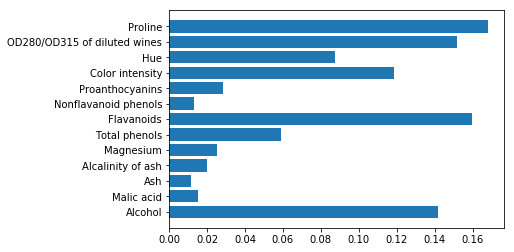

In [16]:
plt.barh(X_train.columns, rf.feature_importances_)

<BarContainer object of 13 artists>

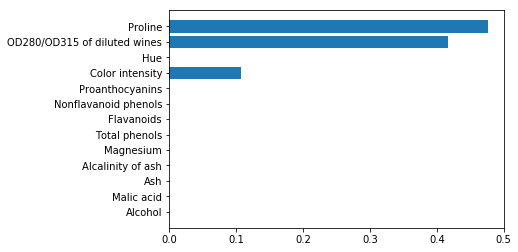

In [17]:
plt.barh(X_train.columns, model.feature_importances_)

In [18]:
# 50K

In [19]:
df = pd.read_csv('adult.data', header=None)
df.shape

(32561, 15)

In [20]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(   0                  1       2           3   4                    5   \
 0  39          State-gov   77516   Bachelors  13        Never-married   
 1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
 2  38            Private  215646     HS-grad   9             Divorced   
 3  53            Private  234721        11th   7   Married-civ-spouse   
 4  28            Private  338409   Bachelors  13   Married-civ-spouse   
 
                    6               7       8        9     10  11  12  \
 0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
 1     Exec-managerial         Husband   White     Male     0   0  13   
 2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
 3   Handlers-cleaners         Husband   Black     Male     0   0  40   
 4      Prof-specialty            Wife   Black   Female     0   0  40   
 
                13      14  
 0   United-States   <=50K  
 1   United-States   <=50K  
 2   United-States   <=50K 

In [21]:
df2 = pd.read_csv('adult.test',header=0)
df2.shape

(16280, 15)

In [22]:
df2.head(2)

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [23]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df2.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [24]:
dft = pd.concat((df,df2), axis=0).dropna()
dft.head(), dft.shape

(   age          workclass  fnlwgt   education  education-num  \
 0   39          State-gov   77516   Bachelors             13   
 1   50   Self-emp-not-inc   83311   Bachelors             13   
 2   38            Private  215646     HS-grad              9   
 3   53            Private  234721        11th              7   
 4   28            Private  338409   Bachelors             13   
 
         marital-status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital-gain  capital-loss  hours-per-week  native-country  income  
 0          2174             0              40   Unit

In [25]:
dft.iloc[:,-1].unique()
#df.get_dummies(df)

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [26]:
dft = dft.replace(' <=50K.',' <=50K')
dft = dft.replace(' >50K.',' >50K')

In [27]:
dft.iloc[:,-1].unique()

array([' <=50K', ' >50K'], dtype=object)

In [28]:
dftt = pd.get_dummies(dft)

In [29]:
dftt.shape, dftt.columns

((48841, 110),
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
        'workclass_ Local-gov', 'workclass_ Never-worked',
        ...
        'native-country_ Scotland', 'native-country_ South',
        'native-country_ Taiwan', 'native-country_ Thailand',
        'native-country_ Trinadad&Tobago', 'native-country_ United-States',
        'native-country_ Vietnam', 'native-country_ Yugoslavia',
        'income_ <=50K', 'income_ >50K'],
       dtype='object', length=110))

In [30]:
dftt.iloc[-5:,-1]


16275    0
16276    0
16277    0
16278    0
16279    1
Name: income_ >50K, dtype: uint8

In [31]:
y = dftt['income_ >50K']
X = dftt.iloc[:, :-2]
X.shape, y.shape

((48841, 108), (48841,))

In [32]:
#정규화 df = (df - df.min()) / (df.max() - df.min())
X_norm = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
X= X_norm

In [33]:
lenth = len(df)
X_train = X[:lenth]
X_test = X[lenth:]
y_train = y[:lenth]
y_test = y[lenth:]
X_train.shape, X_test.shape

((32561, 108), (16280, 108))

In [34]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
model.score(X_test, y_test)

0.851965601965602

In [35]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
rf.score(X_train,y_train), rf.score(X_test,y_test)

(0.9999692884125181, 0.8495085995085995)

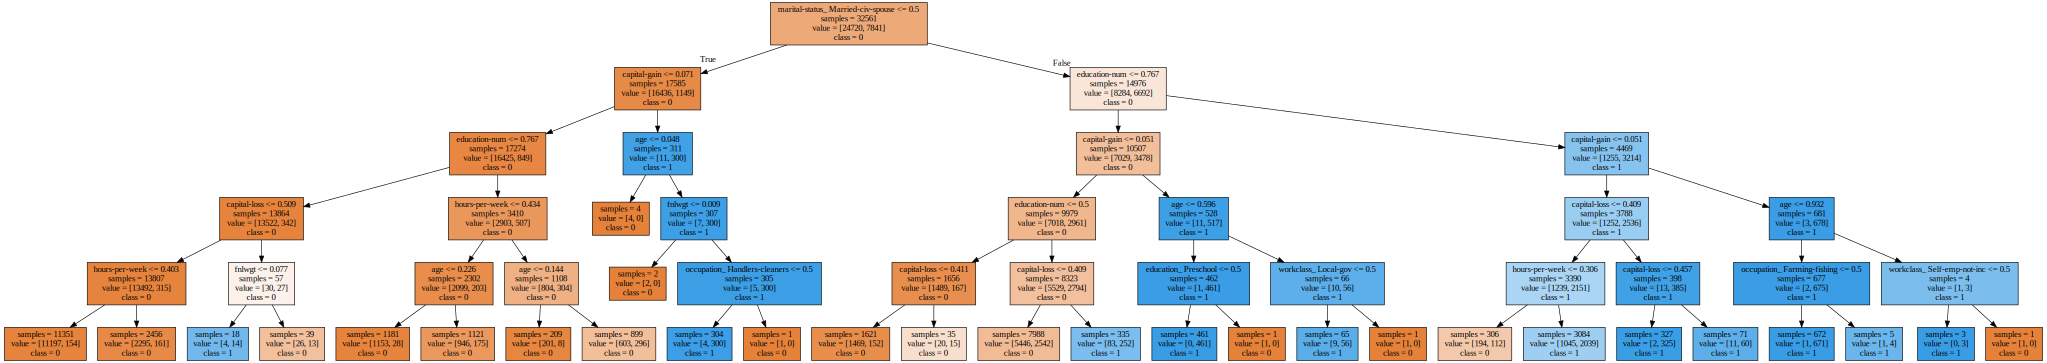

In [36]:
export_graphviz(model, out_file='k.dot', class_names=['0','1'], feature_names=X_train.columns, impurity=False, filled=True)
with open('k.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [37]:
#bank

In [38]:
df = pd.read_csv('bank/bank.csv',sep=';')

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [41]:
(df['y']=='yes').mean()

0.11523999115239991

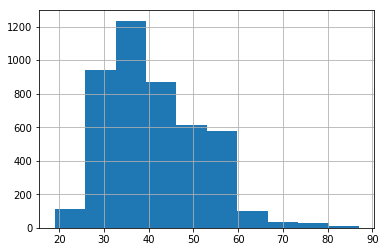

In [42]:
df['age'].hist()

In [43]:
df.isna().sum().sum()

0

In [44]:
j= df['job']
j.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

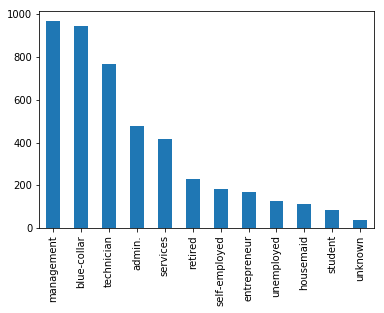

In [45]:
j.value_counts().plot.bar()

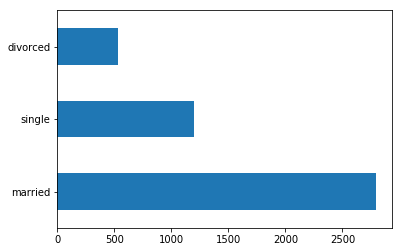

In [46]:
df.marital.value_counts().plot.barh()

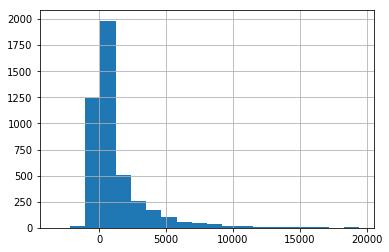

In [47]:
df[df.balance <20000].balance.hist(bins=20) # EDM 작업 > 탐색적 데이터 분석

In [48]:
df2 = df.iloc[:,:-1]
#df22 = df2.drop(columns=['day','month'])
df2['day'] = df2['day'].astype('object')
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [49]:
df_hot = pd.get_dummies(df2)

In [50]:
df_hot.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'month_apr', 'month_aug', 'month_dec', 'month_f

In [51]:
pca = PCA(n_components=2).fit(df_hot)

In [52]:
x_pca = pca.transform(df_hot) #주성분 2개 추출
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
p1 = km.predict(x_pca)

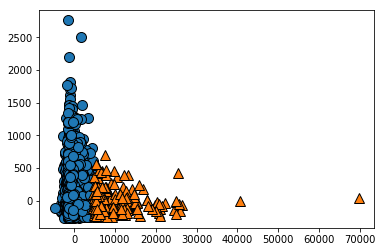

In [53]:
# 1. mean 
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p1)

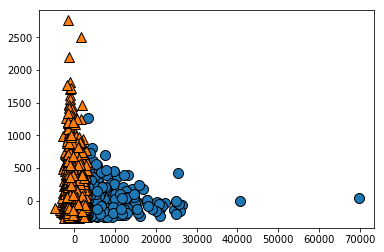

In [54]:
# 2. 병합군집
model1 = AgglomerativeClustering(n_clusters=2)
p2 = model1.fit_predict(x_pca)
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p2)

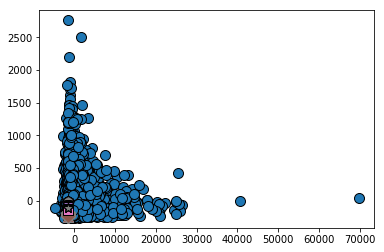

In [55]:
#3. DBSCAN
p3 = DBSCAN(eps=2, min_samples=5).fit_predict(x_pca)
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p3)

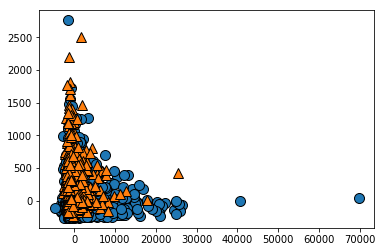

In [56]:
# 정답
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], df.iloc[:,-1])

In [57]:
df_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 81 columns):
age                    4521 non-null int64
balance                4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_divorced       4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-n

In [58]:
# x,y 구분

X = df_hot
y = df.iloc[:,-1]
X.head(), y.head()

(   age  balance  duration  campaign  pdays  previous  job_admin.  \
 0   30     1787        79         1     -1         0           0   
 1   33     4789       220         1    339         4           0   
 2   35     1350       185         1    330         1           0   
 3   30     1476       199         4     -1         0           0   
 4   59        0       226         1     -1         0           0   
 
    job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
 0                0                 0              0  ...          0   
 1                0                 0              0  ...          0   
 2                0                 0              0  ...          0   
 3                0                 0              0  ...          1   
 4                1                 0              0  ...          0   
 
    month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  \
 0          0          0          0          1          0              

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y) # test_size = 0.25, random_state=42

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3390, 81), (1131, 81), (3390,), (1131,))

In [61]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)

In [62]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9162241887905604, 0.9062776304155614)

<BarContainer object of 81 artists>

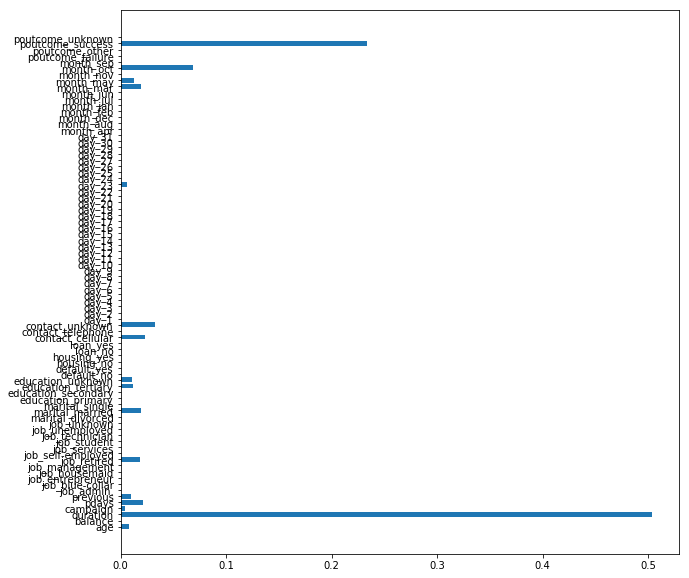

In [63]:
plt.figure(figsize=(10,10))
plt.barh(X_train.columns, model.feature_importances_)

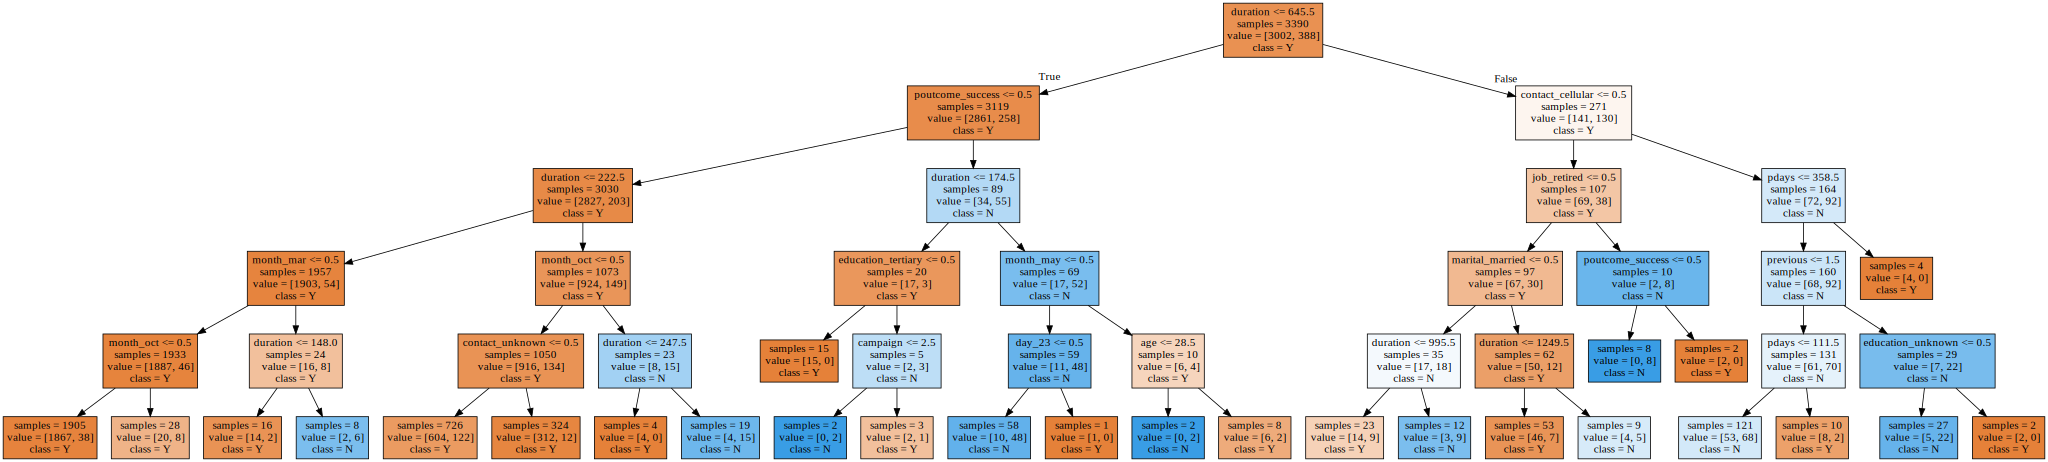

In [64]:
export_graphviz(model, out_file='bank.dot', class_names=['Y','N'], feature_names=X.columns, impurity=False, filled=True)
with open('bank.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
#g.render(filename='bank2', format='png', view=False)
display(g)